# Pandas Foundation

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%autosave 100

# Data ingestion & inspection

In [13]:
# -----------------------------------------------------------------------> Inspecting your data

#download file

from urllib.request import urlretrieve
import pandas as pd

# filename = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1639/datasets/world_ind_pop_data.csv'
# urlretrieve(filename, 'world_ind_pop_data.csv')

df = pd.read_csv('world_ind_pop_data.csv')

#----------------------------------------

# Select the correct answer for the first and last values in the 'Year' and 'Total Population' columns.

df.head()
df.tail()

# First: 1960, 92495900.0; Last: 2014, 15245855.0.

In [25]:
# -----------------------------------------------------------------------> DataFrame data types

#pre_code
mask = df['Total Population'] < 1000000
df.loc[mask, 'Total Population'] = np.nan

#--------------------------------------------------

# The data is of mixed type, and 3460 float64s are missing.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13374 entries, 1960 to 2014
Data columns (total 4 columns):
CountryName                      13374 non-null object
CountryCode                      13374 non-null object
Total Population                 9914 non-null float64
Urban population (% of total)    13374 non-null float64
dtypes: float64(2), object(2)
memory usage: 842.4+ KB


In [32]:
# -----------------------------------------------------------------------> NumPy and pandas working together

#pre_code
from urllib.request import urlretrieve
import pandas as pd
# filename = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1639/datasets/world_population.csv'
# urlretrieve(filename, 'world_population.csv')

df = pd.read_csv(filename, index_col='Year')
print(df)

# Import numpy
import numpy as np

# Create array of DataFrame values: np_vals
np_vals = df.values

# Create new array of base 10 logarithm values: np_vals_log10
np_vals_log10 = np.log10(np_vals)

# Create array of new DataFrame by passing df to np.log10(): df_log10
df_log10 = np.log10(df)

# Print original and new data containers
print(type(np_vals), type(np_vals_log10))
print(type(df), type(df_log10))


      Total Population
Year                  
1960      3.034971e+09
1970      3.684823e+09
1980      4.436590e+09
1990      5.282716e+09
2000      6.115974e+09
2010      6.924283e+09
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [33]:
# -----------------------------------------------------------------------> Zip lists to build a DataFrame
#precode
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

# ------------------------------
# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys, list_values))

# Inspect the list using print()
print(zipped)

# Build a dictionary with the zipped list: data
data = dict(zipped)

# Build and inspect a DataFrame from the dictionary: df
df = pd.DataFrame(data)
print(df)






[('Country', ['United States', 'Soviet Union', 'United Kingdom']), ('Total', [1118, 473, 273])]
          Country  Total
0   United States   1118
1    Soviet Union    473
2  United Kingdom    273


In [35]:
# -----------------------------------------------------------------------> Labeling your data

#precode
import numpy as np
array = np.array([[1980,'Blondie','Call Me', 6],
                  [1981,'Chistorpher Cross','Arthurs Theme', 3],
                  [1982,'Joan Jett', 'I Love Rock and Roll', 7]])

import pandas as pd
df = pd.DataFrame(array)
print(df)
# Intentionally assigning bad column labels
df.columns = ['a','b','c','d']

print(df)

# ---------------------------------

# Build a list of labels: list_labels
list_labels = ['year', 'artist','song', 'chart weeks']

# Assign the list of labels to the columns attribute: df.columns
df.columns = list_labels

print(df)


      0                  1                     2  3
0  1980            Blondie               Call Me  6
1  1981  Chistorpher Cross         Arthurs Theme  3
2  1982          Joan Jett  I Love Rock and Roll  7
      a                  b                     c  d
0  1980            Blondie               Call Me  6
1  1981  Chistorpher Cross         Arthurs Theme  3
2  1982          Joan Jett  I Love Rock and Roll  7
   year             artist                  song chart weeks
0  1980            Blondie               Call Me           6
1  1981  Chistorpher Cross         Arthurs Theme           3
2  1982          Joan Jett  I Love Rock and Roll           7


In [36]:
# -----------------------------------------------------------------------> Building DataFrames with broadcasting

cities = ['Manheim', 'Preston park', 'Biglerville', 'Indiana', 'Curwensville', 'Crown', 'Harveys lake', 'Mineral springs', 'Cassville', 'Hannastown', 'Saltsburg', 'Tunkhannock', 'Pittsburgh', 'Lemasters', 'Great bend']

# ------------------------

# Make a string with the value 'PA': state
state = 'PA'

# Construct a dictionary: data
data = {'state': state, 'city': cities}

# Construct a DataFrame from dictionary data: df
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

               city state
0           Manheim    PA
1      Preston park    PA
2       Biglerville    PA
3           Indiana    PA
4      Curwensville    PA
5             Crown    PA
6      Harveys lake    PA
7   Mineral springs    PA
8         Cassville    PA
9        Hannastown    PA
10        Saltsburg    PA
11      Tunkhannock    PA
12       Pittsburgh    PA
13        Lemasters    PA
14       Great bend    PA


In [37]:
# -----------------------------------------------------------------------> Reading a flat file

# Read in the file: df1
df1 = pd.read_csv('world_population.csv')

# Create a list of the new column labels: new_labels
new_labels = ['year', 'population']

# Read in the file, specifying the header and names parameters: df2
df2 = pd.read_csv('world_population.csv', header=0, names=new_labels)

# Print both the DataFrames
print(df1)
print(df2)

   Year  Total Population
0  1960      3.034971e+09
1  1970      3.684823e+09
2  1980      4.436590e+09
3  1990      5.282716e+09
4  2000      6.115974e+09
5  2010      6.924283e+09
   year    population
0  1960  3.034971e+09
1  1970  3.684823e+09
2  1980  4.436590e+09
3  1990  5.282716e+09
4  2000  6.115974e+09
5  2010  6.924283e+09


In [45]:
# -----------------------------------------------------------------------> Delimiters, headers, and extensions

#precode 

from urllib.request import urlretrieve
import pandas as pd

# filename = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_2289/datasets/messy_stock_data.txt'
urlretrieve(filename, 'messy_stock_data.tsv')

file_messy = 'messy_stock_data.tsv'

# urllib.request.urlretrieve (filename, file_messy) ------other way to download 


file_clean = 'tmp_clean_stock_data.csv'


# ------------------------------------------------

# Read the raw file as-is: df1
df1 = pd.read_csv(file_messy)

# Print the output of df1.head()
print(df1.head())

# Read in the file with the correct parameters: df2
df2 = pd.read_csv(file_messy, delimiter=' ', header=3, comment='#')

# Print the output of df2.head()
print(df2.head())

# Save the cleaned up DataFrame to a CSV file without the index
df2.to_csv(file_clean, index=False)

# Save the cleaned up DataFrame to an excel file without the index
df2.to_excel('file_clean.xlsx', index=False)

('messy_stock_data.tsv', <http.client.HTTPMessage at 0x23605f897b8>)

                                                   The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of comments are not very useful                                                  are they?                        
Probably should just throw this line away too          but not the next since those are column labels                        
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct No...                                                NaN                        
# So that line you just read has all the column...                                                NaN                        
IBM 156.08 160.01 159.81 165.22 172.25 167.15 1...                                                NaN                        
     name     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0     IBM  156.08  160.01  159.81  165.22  172.25  167.15  164.75  152.77   
1    MSFT   45.51   43.08   42.13   43.47   47.53   45.96   45.61   45.51   
2  GOOGLE  51

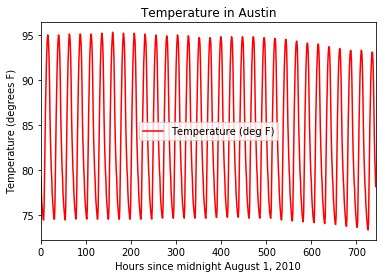

In [48]:
# -----------------------------------------------------------------------> Plotting series using pandas
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
# Read in all the data
# filename = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1639/datasets/NCDC_NOAA_HOURLY_DATA_AUSTIN_2010_794719.csv'
# urlretrieve(filename,'NCDC_NOAA_HOURLY_DATA_AUSTIN_2010_794719.csv')
df = pd.read_csv('NCDC_NOAA_HOURLY_DATA_AUSTIN_2010_794719.csv', index_col='DATE', parse_dates=True)
# pull out only August data, only hourly temperature data, so the plot is less confusing
df = df.loc['2010-Aug']
df = df[['HLY-TEMP-NORMAL']]
# Clean up column label and index, to simplify lesson, we are not ready to talk about DateTime objects yet.
df.columns = ['Temperature (deg F)']
df.reset_index(inplace=True,drop=True)

# ---------------------------------

# Create a plot with color='red'
df.plot(color='red')

# Add a title
plt.title('Temperature in Austin')

# Specify the x-axis label
plt.xlabel('Hours since midnight August 1, 2010')

# Specify the y-axis label
plt.ylabel('Temperature (degrees F)')

# Display the plot
plt.show()

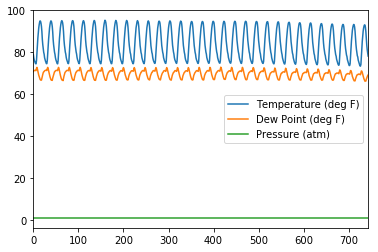

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023609435F60>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000023609595B70>], dtype=object)

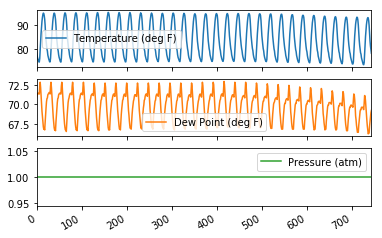

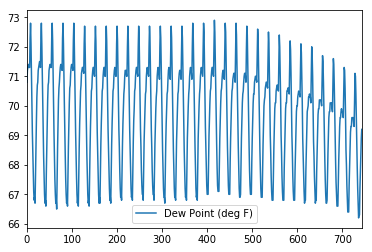

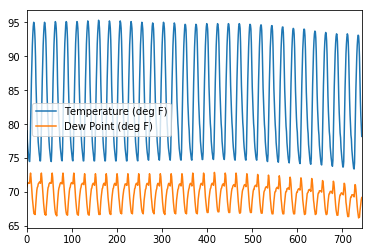

In [50]:
# -----------------------------------------------------------------------> Plotting DataFrames

df = pd.read_csv('NCDC_NOAA_HOURLY_DATA_AUSTIN_2010_794719.csv', index_col='DATE', parse_dates=True)
df = df.loc['2010-Aug']
df = df[['HLY-TEMP-NORMAL','HLY-DEWP-NORMAL','HLY-PRES-NORMAL']]
df.columns = ['Temperature (deg F)', 'Dew Point (deg F)', 'Pressure (atm)']
df.reset_index(inplace=True,drop=True)

#---------------------------------------

# Plot all columns (default)
df.plot()
plt.show()

# Plot all columns as subplots
df.plot(subplots=True)
plt.show()

# Plot just the Dew Point data
column_list1 = ['Dew Point (deg F)']
df[column_list1].plot()
plt.show()

# Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['Temperature (deg F)','Dew Point (deg F)']
df[column_list2].plot()
plt.show()



In [ ]:
# -----------------------------------------------------------------------> 

In [ ]:
# -----------------------------------------------------------------------> 

In [ ]:
# -----------------------------------------------------------------------> 